In [1]:
pip install keras==2.15.0

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.7 MB 1.3 MB/s eta 0:00:02
   ---------- ----------------------------- 0.5/1.7 MB 4.0 MB/s eta 0:00:01
   ------------------- -------------------- 0.8/1.7 MB 5.3 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.7 MB 5.0 MB/s eta 0:00:01
   ---------------------------- ----------- 1.2/1.7 MB 4.8 MB/s eta 0:00:01
   -------------------------------- ------- 1.4/1.7 MB 4.6 MB/s eta 0:00:01
   ------------------------------------ --- 1.6/1.7 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 4.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.2.1
    Uninstalling keras-3.2.1:
      Successfully uninstalled keras-3.2.1
Note: you may need to restar

In [2]:
pip install tensorflow-decision-forests==1.8.1

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/15.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.2 MB ? eta -:--:--
     --------------------------------------- 0.0/15.2 MB 325.1 kB/s eta 0:00:47
     --------------------------------------- 0.1/15.2 MB 491.5 kB/s eta 0:00:31
     --------------------------------------- 0.1/15.2 MB 774.0 kB/s eta 0:00:20
      -------------------------------------- 0.2/15.2 MB 888.4 kB/s eta 0:00:17
      --------------------------------------- 0.3/15.2 MB 1.0 MB/s eta 0:00:15
      --------------------------------------- 0.4/15.2 MB 1.2 MB/s eta 0:00:13
     - -------------------------------------- 0.5/15.2 MB 1.3 MB/s eta 0:00:12
     - -------------------------------------- 0.6/15.2 MB 1.4 MB/s eta 0:00:11
     - -------------------------------------- 0.7/15.2 MB 1.4 MB/s eta 0:00:11
     - -------------------------------------- 0.8/15.2 MB 1.5 M

ERROR: Could not find a version that satisfies the requirement tensorflow~=2.15.0 (from tensorflow-decision-forests) (from versions: 2.16.0rc0, 2.16.1)
ERROR: No matching distribution found for tensorflow~=2.15.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import random
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from keras.optimizers import Adam, RMSprop, SGD
from keras import regularizers
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
import datetime
from keras.utils import plot_model

ModuleNotFoundError: No module named 'tensorflow.python'

In [3]:
from IPython.display import SVG, Image


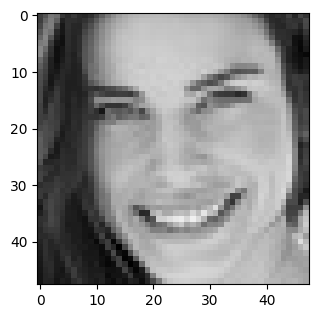

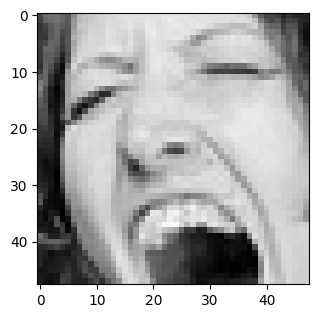

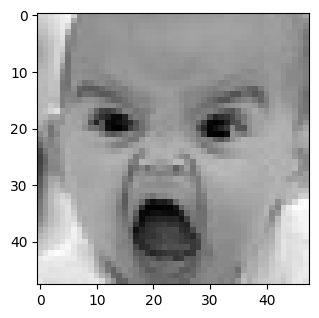

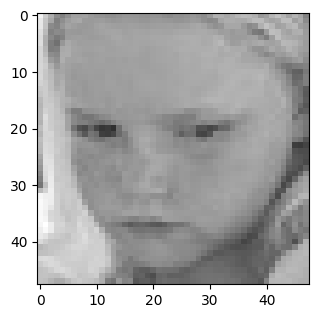

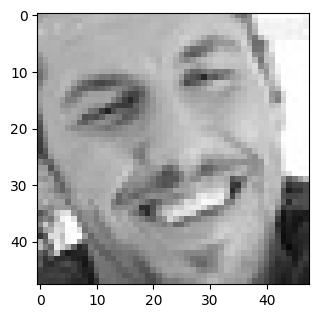

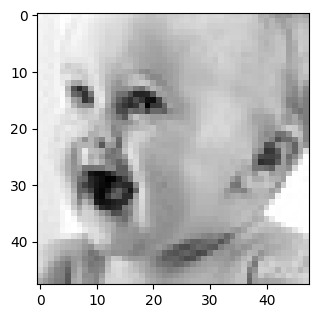

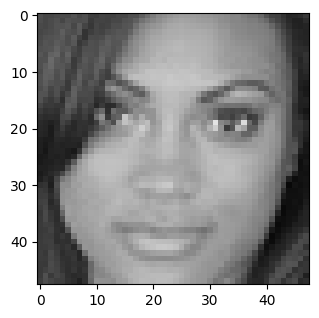

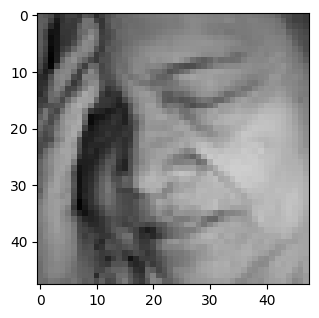

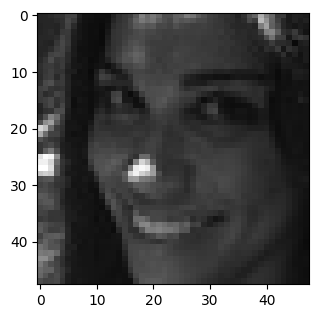

In [4]:
# train_img=("/kaggle/input/fer2013/train/**/**")
train_img=("train/**/**")
images=glob(train_img)
for i in range(9):
    image=random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)    
    plt.imshow(cv2.imread(image))#;plt.axis('off')

In [ ]:
train_dir = '/kaggle/input/fer2013/train'
test_dir = "/kaggle/input/fer2013/test"

row = 48
col = 48
classes = len(os.listdir('/kaggle/input/fer2013/train'))

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True,
                                   rotation_range=10,
                                   width_shift_range= 0.1,
                                   height_shift_range= 0.1,
                                   shear_range= 0.2 )
        


training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

In [ ]:
def get_model(input_size, classes=7):
     #Initialising the CNN
    model = tf.keras.models.Sequential()   

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape =input_size))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(classes, activation='softmax'))

    #Compliling the model
    model.compile(optimizer=Adam(learning_rate=0.0001), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

In [ ]:
fernet = get_model((48,48,1))
fernet.summary()

In [ ]:
plot_model(fernet, to_file='fernet.png', show_shapes=True, show_layer_names=True)

In [ ]:
# def scheduler(epoch, learning_rate):
#     if epoch < 10:
#         return learning_rate
#     else:
#         return learning_rate * tf.math.exp(-0.1)

# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
#                               factor=0.2, 
#                               patience=6, 
#                               verbose=1,
#                               min_delta=0.0001)

In [ ]:
# epochs = 50

# steps_per_epoch = len(train_generator)
# validation_steps = len(validation_generator)

# checkpoint = ModelCheckpoint("model_weights.weights.h5", monitor = "val_accuracy",save_best_only = True ,save_weights_only = True, mode = "max", verbose =1)
# callbacks = (checkpoint,)



In [ ]:
chk_path = 'ferNet.keras'
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             monitor='val_accuracy')

earlystop = EarlyStopping(monitor='val_accuracy', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training.log')

callbacks = [checkpoint, reduce_lr, csv_logger]

In [ ]:
steps_per_epoch = training_set.n // training_set.batch_size
validation_steps = test_set.n // test_set.batch_size

hist = fernet.fit(x=training_set,
                  validation_data=test_set,
                  epochs=20,
                  callbacks=callbacks,
                  steps_per_epoch=steps_per_epoch,
                  validation_steps=validation_steps)

In [ ]:
fernet.evaluate(test_set)

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

In [ ]:
print("Training Loss:", hist.history['loss'])
print("Validation Loss:", hist.history['val_loss'])

In [ ]:
train_loss, train_accu = fernet.evaluate(training_set)
test_loss, test_accu = fernet.evaluate(test_set)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

In [ ]:
model_json=fernet.to_json()
with open('model.json','w') as json_file:
    json_file.write(model_json)

In [ ]:

from keras.models import model_from_json

# Path to the JSON file containing the model architecture
json_file = 'model.json'

# Load JSON file and create model
with open(json_file, 'r') as file:
    loaded_model_json = file.read()

loaded_model = model_from_json(loaded_model_json)

# Print a summary of the loaded model
loaded_model.summary()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import model_from_json
import json

# Load the model architecture from the JSON file
with open('model.json', 'r') as json_file:
    model_json = json_file.read()

# Load the model weights
loaded_model = model_from_json(model_json)
loaded_model.load_weights('ferNet.keras')

# Save the model as an HDF5 file
loaded_model.save('ferNet.h5')
